<a href="https://colab.research.google.com/github/caiofrz/sistemas_inteligentes/blob/main/Atividade_Algoritmo_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET - Titanic Dataset** (https://www.kaggle.com/datasets/yasserh/titanic-dataset)

Este possui informações sobre os passageiros do Titanic, como classe social, idade, sexo e se sobreviveram ou não ao naufrágio.

As features utilizadas para prever a sobrevivência são:

Pclass: Classe social (1ª, 2ª ou 3ª classe)
Age: Idade do passageiro
Sex: Sexo do passageiro (masculino ou feminino)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
# Carregando o dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [31]:
# Selecionando as features de interesse
X = df[['Pclass', 'Age', 'Sex']]
y = df['Survived']

In [32]:
# Tratando valores nulos
X['Age'].fillna(X['Age'].mean(), inplace=True)

le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

<ipython-input-32-e9f13d2382b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)
<ipython-input-32-e9f13d2382b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


In [33]:
# Padronizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Definindo um range de valores para K
neighbors_setting = range(1, 20)

# Criando listas para armazenar os resultados
precisao_treinamento = []
precisao_teste = []

# Treinando e avaliando para diferentes valores de K
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    precisao_treinamento.append(knn.score(X_train, y_train))
    precisao_teste.append(knn.score(X_test, y_test))

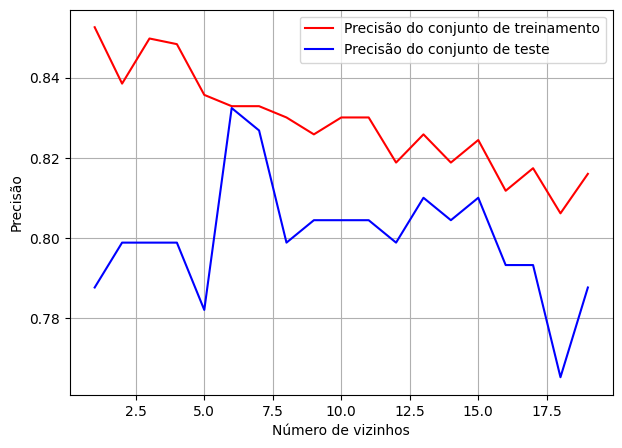

In [36]:
# Plotando a curva de precisão
plt.figure(figsize=(7,5),dpi=100)
plt.plot(neighbors_setting,precisao_treinamento,label="Precisão do conjunto de treinamento", color ='red')
plt.plot(neighbors_setting,precisao_teste,label="Precisão do conjunto de teste", color ='blue')
plt.xlabel("Número de vizinhos")
plt.ylabel("Precisão")
plt.grid()
plt.legend()
plt.show()

In [37]:
# Selecionando o melhor valor de K
k_optimum = neighbors_setting[precisao_teste.index(max(precisao_teste))]

# Treinando o modelo final com o K otimizado
knn = KNeighborsClassifier(n_neighbors=k_optimum)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

array([[97,  8],
       [22, 52]])

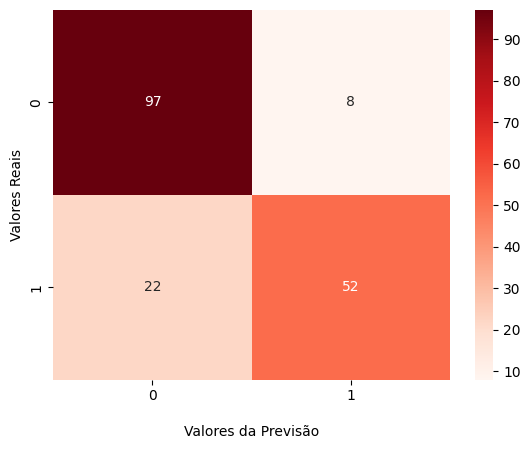

In [38]:
# Plotando mapa da matriz de confusão
cs = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cs, annot=True, cmap='Reds')

ax.set_xlabel('\nValores da Previsão')
ax.set_ylabel('Valores Reais');

# Visualizando a matriz de confusão
confusion_matrix(y_test, y_pred)

In [39]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliando a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

Precisão: 0.8324022346368715


In [41]:
# Avaliando a taxa de erro do modelo
error = 1-accuracy
print("Taxa de erro: ", error)

Taxa de erro:  0.16759776536312854
